<a href="https://colab.research.google.com/github/toamuse/Business_Intelligence_and_Analytics_Assignments/blob/main/Assignment_1_Mosley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

For the first assignment, you will apply what you have learnt in the first labs. You have the opportunity to review and practice data cleaning and also SQL. The first dataset consists of data for loan applications at a bank. One row represents one past loan application, the features of the applicant and whether it was accepted or not. 

You will apply exploratory data analysis on it. You can use what you learnt previously from the first exercises. The methology behind this assignment is quite similar, but since the dataset is different you should sometimes adapt your code.

**Note: After your modifications the dataframe will change. You continue working on the modified version of the dataframe.**

### Important Notice : 
You are supposed to fill this notebook following the instructions (i.e. writing code in the cells with *#YOUR CODE HERE*). Your code should be able to provide the solution so that you can answer various questions posed in this notebook and in a Moodle Quiz. You'll be evaluated on both readability of the notebook and correctness of the answers given on Moodle.

So for this assignment you have to complete this notebook and then (you have to do BOTH!):

1. Submit your Python notebook here: https://moodle.unil.ch/mod/assign/view.php?id=787962
2. Answer the questions in this Moodle Quiz:
https://moodle.unil.ch/mod/quiz/view.php?id=786880 (you can only submit ONCE!)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<br>
First, load the file from our github link in a Dataframe.

In [ ]:
url = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/new_application_train_1.csv'
loan_data = pd.read_csv(url, index_col = 0)
loan_data.head()

,Unnamed: 0.1,Unnamed: 0.1.1,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,LESS_USE
0,0,61615,171459,0,Cash loans,F,N,N,0,85500.0,314100.0,13963.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.020713,-23638,365243,-15379.0,-4747,NaN,1,0,0,1,0,0,NaN,1.0,3,2,FRIDAY,9,0,0,0,0,0,0,XNA,NaN,0.176981,0.746300,0.0722,0.0848,0.9791,0.7144,0.0611,0.00,0.1379,0.1667,0.2083,0.0246,0.0588,0.0670,0.0,0.0000,0.0735,0.0880,0.9791,0.7256,0.0616,0.0000,0.1379,0.1667,0.2083,0.0252,0.0643,0.0698,0.0,0.0000,0.0729,0.0848,0.9791,0.7182,0.0615,0.00,0.1379,0.1667,0.2083,0.0251,0.0599,0.0682,0.0,0.0000,reg oper account,block of flats,0.0527,"Stone, brick",No,0.0,0.0,0.0,0.0,-113.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,999999
1,1,189636,319874,0,Cash loans,M,Y,N,1,112500.0,521280.0,27423.0,450000.0,Unaccompanied,Working,Incomplete higher,Separated,House / apartment,0.028663,-15356,-794,-7978.0,-4155,11.0,1,1,0,1,1,0,Core staff,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Self-employed,0.707326,0.623319,0.798137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1607.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,2.0,0.0,999999
2,2,49689,157520,0,Cash loans,F,Y,Y,0,225000.0,1288350.0,41562.0,1125000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.010006,-11903,-841,-8769.0,-875,3.0,1,1,1,1,1,0,Accountants,2.0,2,2,MONDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.731977,0.719397,0.197475,0.2155,0.1485,0.9876,0.8300,0.2185,0.24,0.2069,0.3333,0.3750,0.1796,0.1757,0.2585,NaN,0.0112,0.2195,0.1541,0.9876,0.8367,0.2205,0.2417,0.2069,0.3333,0.3750,0.1837,0.1919,0.2693,NaN,0.0118,0.2176,0.1485,0.9876,0.8323,0.219

***Question 1 :***
<br>
How many rows and columns does the dataset have? (without including the header). 

In [ ]:
loan_data.shape

(29213, 125)

<br>

The `'TARGET'` column indicates the people who have been given a loan (value of 0) and the ones who have not (value of 1). Using a barplot, show how many loans were given (TARGET=0) and how many were declined (TARGET=1).

**Hint:** Use *plot()* method on the result of *value_count()*

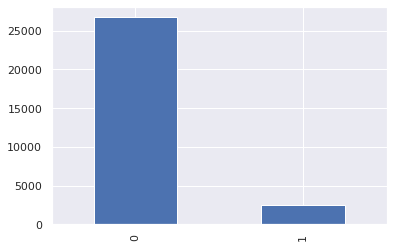

In [ ]:
loan_data['TARGET'].value_counts().plot(kind = 'bar')

***Question 2 :*** <br>
How many loans were accepted (TARGET = 0) vs declined (TARGET = 1)?

In [ ]:
loan_data['TARGET'].value_counts()

0    26753
1     2460
Name: TARGET, dtype: int64

<br>

Use the *describe* method to get some summary statistics about `'DAYS_BIRTH'` and `'DAYS_EMPLOYED'` columns. Do you recognize some weird values ? In the `'DAYS_EMPLOYED'` column, if you plot the histogram, you should see that there are some very large values, distant from the rest of the values. Remove those very large values (eg all the values more than X, you have to decide on the X based on the histogram that you see). These values don't make sense for this column. Plot the histogram of `'DAYS_EMPLOYED'` before and after the removal of those large values and the transformation that we recommend below.
<br>


**Hint:** The values in those two columns are negative because they correspond to a difference in number of days since the beginning of employment or birth. The following transformation can be useful: 
- Taking the absolute value (*abs()*) since we want positive numbers


In [ ]:
loan_data['DAYS_BIRTH'] = loan_data['DAYS_BIRTH'].abs()
loan_data['DAYS_BIRTH'].describe()


count    29213.000000
mean     16056.845001
std       4343.780979
min       7680.000000
25%      12449.000000
50%      15805.000000
75%      19684.000000
max      25196.000000
Name: DAYS_BIRTH, dtype: float64

In [ ]:
loan_data['DAYS_EMPLOYED'] = loan_data['DAYS_EMPLOYED'].abs()
loan_data['DAYS_EMPLOYED'].describe()

count     29213.000000
mean      67580.005682
std      139312.811196
min           2.000000
25%         940.000000
50%        2236.000000
75%        5732.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

**Answer Note:** Those ages look reasonable. There are no outliers for the age on either the high or low end. Employed days doesn't look right! The maximum value is about 1000 years!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c14054518>]],
      dtype=object)

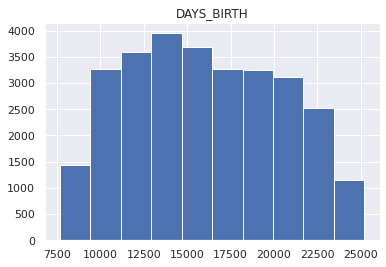

In [ ]:
loan_data.hist(column = 'DAYS_BIRTH')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c08944be0>]],
      dtype=object)

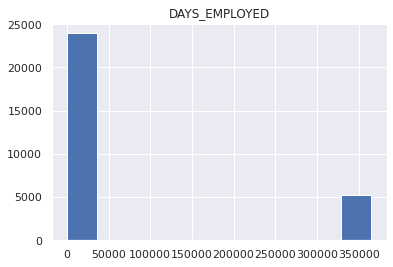

In [ ]:
loan_data.hist(column = 'DAYS_EMPLOYED')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c084419b0>]],
      dtype=object)

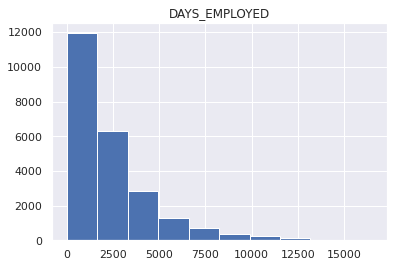

In [ ]:
sub_loan_data = loan_data[loan_data['DAYS_EMPLOYED'] < 17000]
sub_loan_data.hist(column = 'DAYS_EMPLOYED') 

***Question 3:*** <br>
After the removal of the outliers, what is the new mean value of `'DAYS_EMPLOYED'` column? (rounded to the nearest integer)

In [ ]:
sub_loan_data.DAYS_EMPLOYED.describe().round()

count    23965.0
mean      2396.0
std       2347.0
min          2.0
25%        767.0
50%       1656.0
75%       3198.0
max      16481.0
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
sub_loan_data = (loan_data.DAYS_EMPLOYED < 17000)
loan_data = loan_data[sub_loan_data]

For each column, compute the number of missing entries and the percentage of the total rows in the column that it represents.

**Hint:** Consider summing the null values using the *isnull()* and *sum()* methods 

In [ ]:
loan_data.isnull().sum()

Unnamed: 0.1                        0
Unnamed: 0.1.1                      0
SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                    25
NAME_TYPE_SUITE                    96
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     14860
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PH

In [ ]:
loan_data.isnull().sum() * 100/ len(loan_data) 

Unnamed: 0.1                     0.000000
Unnamed: 0.1.1                   0.000000
SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.104319
NAME_TYPE_SUITE                  0.400584
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     62

***Question 4:*** <br>
What is the number of missing values for the column `'OWN_CAR_AGE'`? 

In [ ]:
loan_data['OWN_CAR_AGE'].isnull().sum()

14860

***Question 5:*** <br>
What is the percentage of missing values for the column `'COMMONAREA_MODE'`? (rounded to the nearest integer)

In [ ]:
per_null = loan_data['COMMONAREA_MODE'].isnull().sum()*100 / len(loan_data.COMMONAREA_MODE)

per_null.round()

69.0

Write some code to get the datatype (int64, float64...) of each column. For this just show the datatype of the columns as recognized by the default loading of the csv file (use command dtypes). Also count how many of each datatype you have.

In [ ]:
loan_data.dtypes

Unnamed: 0.1                      int64
Unnamed: 0.1.1                    int64
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64


In [ ]:
loan_data.loc[:].dtypes.value_counts()

float64    65
int64      44
object     16
dtype: int64

***Question 6:*** <br>
How many variables are numeric continuous (ie, “float64”) ? 

In [ ]:
loan_data.dtypes.value_counts()

float64    65
int64      44
object     16
dtype: int64

***Question 7:*** <br>
How many variables are numeric discrete (ie, “int64”) ? 

In [ ]:
loan_data.dtypes.value_counts()

float64    65
int64      44
object     16
dtype: int64

***Question 8:*** <br>
How many variables are categorical (ie, “object”) ? 

In [ ]:
loan_data.dtypes.value_counts()

float64    65
int64      44
object     16
dtype: int64

Convert the column `'FLAG_CONT_MOBILE'` of our dataframe to a categorical variable.

In [ ]:
loan_data['FLAG_CONT_MOBILE'] = loan_data['FLAG_CONT_MOBILE'].astype(object)

<br>

Remove the NULL values (use the dropna function) and plot the distribution of the `AMT_CREDIT` and the `AMT_GOODS_PRICE`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c0704dc18>]],
      dtype=object)

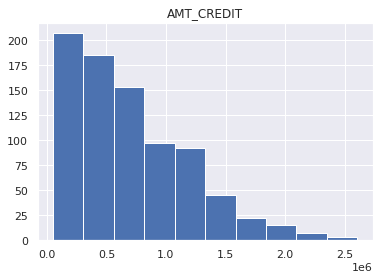

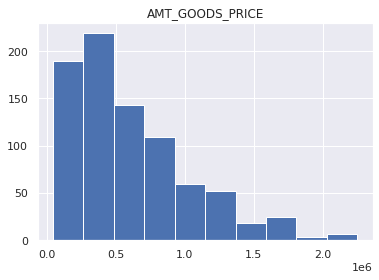

In [ ]:
loan_data = loan_data.dropna()

loan_data.hist(column = 'AMT_CREDIT')

loan_data.hist(column = 'AMT_GOODS_PRICE')

***Question 9:***<br>
What distribution does the `AMT_CREDIT` and the `AMT_GOODS_PRICE` histogram resemble?

- Gaussian
- Uniform
- None of the above


In [ ]:
print("None of the above")

None of the above



Create a pie chart that shows proportion of different values in the column ``'NAME_INCOME_TYPE'`` (income sources of applicant's who applied for loan). You have to count the number of loans for each type and show are a pie chart.

**Hint:** Having a new Dataframe with the *index* and *values* of the result of *value_counts()* will make this plot easy

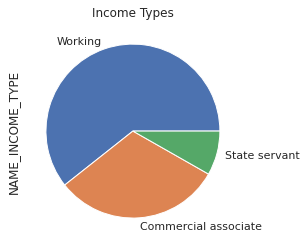

In [ ]:
income_type = loan_data['NAME_INCOME_TYPE']

income_type.value_counts().plot(kind='pie', title = 'Income Types')

***Question 10*** : <br>
What is the percentage of rows that had the value 'Commercial associate' in that column (rounded to the nearest integer, just the number of the percentage without the %, only an integer in the quiz)

In [ ]:
per_ca = loan_data['NAME_INCOME_TYPE'].value_counts(normalize = True) *100

per_ca.round()

Working                 61.0
Commercial associate    31.0
State servant            8.0
Name: NAME_INCOME_TYPE, dtype: float64

Select the rows where `'NAME_CONTRACT_TYPE'` is *Cash loans* and `'AMT_INCOME_TOTAL'` is bigger than 225000

In [ ]:
criteria_1 = loan_data['NAME_CONTRACT_TYPE'] == 'Cash loans'

criteria_2 = loan_data['AMT_INCOME_TOTAL'] > 225000

criteria_all = criteria_1 & criteria_2 

loan_data[criteria_all]

,Unnamed: 0.1,Unnamed: 0.1.1,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,LESS_USE
64,64,46210,153537,0,Cash loans,F,Y,Y,0,675000.0,1223010.0,51817.5,1125000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020246,17136,730,-7207.0,-665,10.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,6,0,0,0,0,0,0,Business Entity Type 3,0.752349,0.334870,0.732403,0.1649,0.1403,0.9747,0.6532,0.0601,0.0000,0.2759,0.1667,0.2083,0.1077,0.1345,0.1400,0.0000,0.0000,0.1681,0.1456,0.9747,0.6668,0.0607,0.0000,0.2759,0.1667,0.2083,0.1101,0.1469,0.1459,0.0000,0.0000,0.1665,0.1403,0.9747,0.6578,0.0605,0.00,0.2759,0.1667,0.2083,0.1096,0.1368,0.1425,0.0000,0.0000,reg oper account,block of flats,0.1101,Panel,No,4.0,0.0,4.0,0.0,-453.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,999999
72,72,251715,391254,0,Cash loans,M,Y,Y,0,675000.0,741555.0,59584.5,657000.0,Other_B,Commercial associate,Higher education,Married,House / apartment,0.046220,10388,1922,-234.0,-2619,11.0,1,1,0,1,0,1,Managers,2.0,1,1,TUESDAY,15,0,1,1,0,0,0,Business Entity Type 3,0.304968,0.324337,0.508287,0.2309,0.1048,0.9930,0.9048,0.0937,0.3200,0.1379,0.5417,0.5833,0.1109,0.1874,0.2847,0.0039,0.0037,0.2353,0.1087,0.9930,0.9085,0.0946,0.3222,0.1379,0.5417,0.5833,0.1134,0.2048,0.2966,0.0039,0.0039,0.2332,0.1048,0.9930,0.9061,0.0943,0.32,0.1379,0.5417,0.5833,0.1128,0.1907,0.2898,0.0039,0.0038,reg oper account,block of flats,0.2760,Panel,No,2.0,0.0,2.0,0.0,-355.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,999999
351,351,187786,317692,0,Cash loans,F,Y,Y,0,315000.0,1800000.0,47484.0,1800000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.072508,17436,6011,-4194.0,-971,2.0,1,1,0,1,1,0,Managers,2.0,1,1,SATURDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.862239,0.746408,0.380800,0.1254,0.1644,0.9876,0.9116,0.0000

***Question 11:*** <br>
How many rows satisfy a *Cash loans* contract and a *AMT total income* bigger than 225000?

In [ ]:
loan_data[criteria_all].shape[0]

228

Create a boxplot for the column `'FLOORSMAX_AVG'`

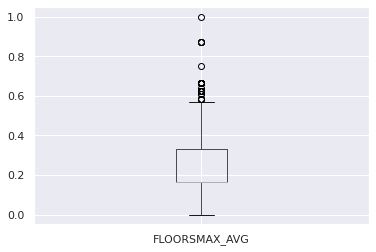

In [ ]:
loan_data.boxplot(column = 'FLOORSMAX_AVG')

***Question 12:*** <br>
From the box plot on `'FLOORSMAX_AVG'`, are there more outliers with small or with large values?

In [ ]:
print("Large values")

Large values


Compute the pearson correlation of all the features with respect to the ``'TARGET'`` variable. Notice that some of the correlations are NaN. Use the 'dropna()' function to remove those values. Plot the 20 most positively correlated variables/columns to 'TARGET'. Plot the 20 most negatively correlated variables/columns to 'TARGET'. Sort them and put them in a **bar chart** for example. 

**Hint:** *corr()* method can be applied to Dataframes

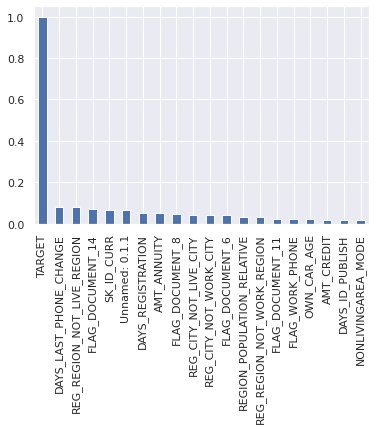

In [ ]:
pearson_corr = loan_data.corr(method = 'pearson')

pearson_corr_TARGET = pearson_corr['TARGET'].dropna()

pearson_corr_TARGET.sort_values(ascending = False).head(20).plot(kind = "bar")


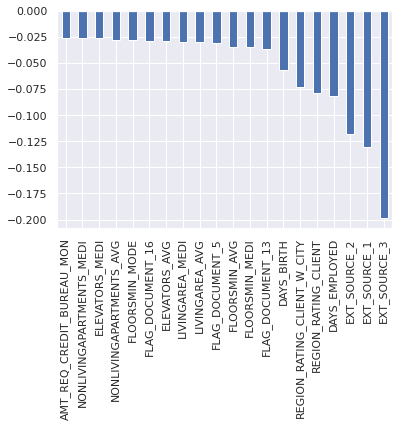

In [ ]:
pearson_corr_TARGET.sort_values(ascending = False).tail(20).plot(kind = "bar")

***Question 13:*** <br>
What is the column with the highest positive correlation to the column ``'TARGET'`` (other than 'TARGET'!)?

In [ ]:
print("DAYS_LAST_PHONE_CHANGED")

DAYS_LAST_PHONE_CHANGED


***Question 14:*** <br>
What is the column with the second highest positive correlation to the column ``'TARGET'``?

In [ ]:
print("REG_REGION_NOT_LIVE_REGION")

REG_REGION_NOT_LIVE_REGION


***Question 15:*** <br>
What is the column **least** correlated to the column ``'TARGET'``?

**Remember:** We are looking for correlation close to zero.

In [ ]:
pearson_corr_TARGET.abs().sort_values(ascending = True)

BASEMENTAREA_MODE               0.000072
LIVE_CITY_NOT_WORK_CITY         0.000123
NONLIVINGAREA_AVG               0.000301
OBS_30_CNT_SOCIAL_CIRCLE        0.000559
FLAG_PHONE                      0.001033
NONLIVINGAREA_MEDI              0.001168
DEF_60_CNT_SOCIAL_CIRCLE        0.001659
CNT_FAM_MEMBERS                 0.001844
OBS_60_CNT_SOCIAL_CIRCLE        0.002154
LANDAREA_AVG                    0.004078
COMMONAREA_MEDI                 0.004241
YEARS_BEGINEXPLUATATION_MODE    0.004944
COMMONAREA_AVG                  0.004989
DEF_30_CNT_SOCIAL_CIRCLE        0.005024
LANDAREA_MODE                   0.005045
AMT_REQ_CREDIT_BUREAU_QRT       0.005120
LANDAREA_MEDI                   0.005556
YEARS_BEGINEXPLUATATION_MEDI    0.005894
YEARS_BEGINEXPLUATATION_AVG     0.005971
YEARS_BUILD_MODE                0.007063
ENTRANCES_MODE                  0.007397
LIVINGAPARTMENTS_MODE           0.007731
AMT_INCOME_TOTAL                0.008011
APARTMENTS_MODE                 0.008305
FLAG_DOCUMENT_20

In [ ]:
print("BASEMENTAREA_MODE")

BASEMENTAREA_MODE


Create a pairplot of columns `'LIVINGAPARTMENTS_AVG'`, `'APARTMENTS_MEDI'`, `'HOUR_APPR_PROCESS_START'` and `'REGION_RATING_CLIENT_W_CITY'`. Use the `'TARGET'` column as the *hue* argument

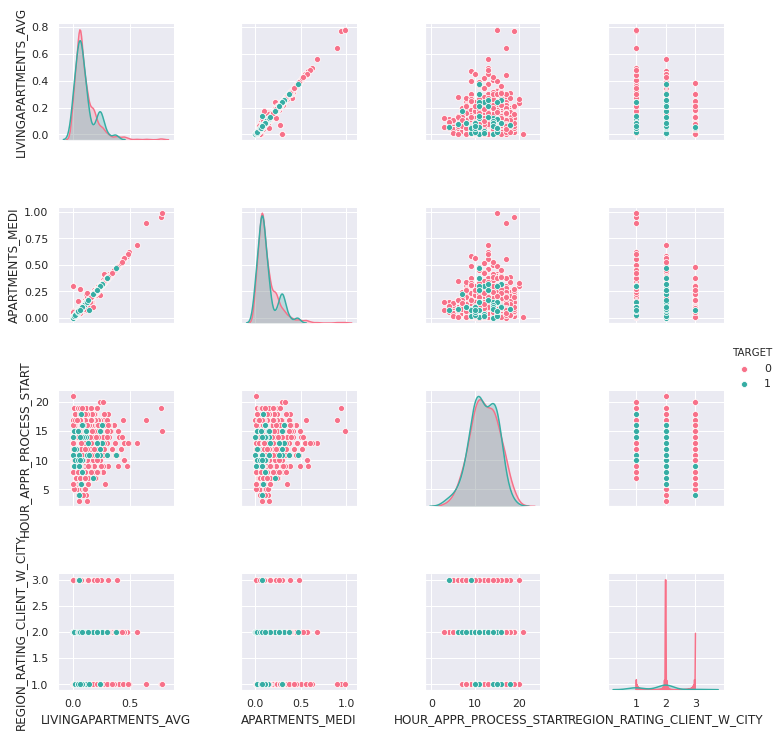

In [ ]:
loan_data_sub3 = loan_data[['LIVINGAPARTMENTS_AVG','APARTMENTS_MEDI','HOUR_APPR_PROCESS_START','REGION_RATING_CLIENT_W_CITY','TARGET']]

sns.pairplot(loan_data_sub3, hue = "TARGET", palette = "husl")

Now, create a heatmap of correlations of columns `'DAYS_BIRTH'`, `'YEARS_BUILD_AVG'`, `'AMT_ANNUITY'` and `'TARGET'` 
 

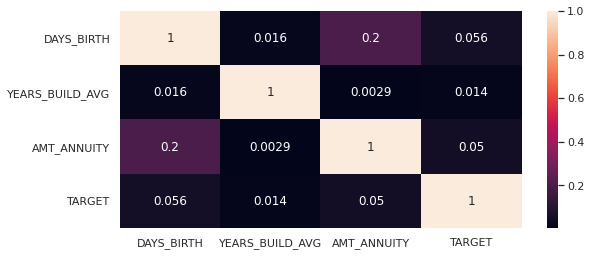

In [ ]:
loan_data_sub4 = loan_data[['DAYS_BIRTH','YEARS_BUILD_AVG','AMT_ANNUITY','TARGET']]
pearson_corr_2 = loan_data_sub4.corr(method = 'pearson').abs()


plt.figure(figsize = (9,4))
sns.heatmap(data = pearson_corr_2, annot = True)

***Question 16:***<br>
Among the above variables ('DAYS_BIRTH', 'YEARS_BUILD_AVG', 'AMT_ANNUITY' and 'TARGET'), what are the 2 variables that are the most correlated?

In [ ]:
print("pairplot: LIVINGAPARTMENTS_AVG and APARTMENTS_MEDI heatmap: DAYS_BIRTH and AMT_ANNUITY")

pairplot: LIVINGAPARTMENTS_AVG and APARTMENTS_MEDI heatmap: DAYS_BIRTH and AMT_ANNUITY


## SQL

Now you will test your knowledge of SQL with some statement. For this we will load the Titanic dataset which you also used in the lab. You have to answer the following questions.

In [ ]:

import pandas as pd
from sqlalchemy import create_engine


db = create_engine('sqlite://', echo=False)


csvfile = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/week6%20-%20SQL2/data/Titanic.csv'
df = pd.read_csv(csvfile)
table_name = "Titanic"
df.to_sql(table_name, con=db) 

In [ ]:
df.head()

,last,first,gender,age,class,fare,embarked,survived
0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
2,Heikkinen,Miss Laina,F,26.0,3,7.9250,Southampton,yes
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
4,Allen,Mr. William Henry,M,35.0,3,8.0500,Southampton,no


***Question 17:***<br>
Are there any pairs of passengers with the same last name where one is in first class and the other is in third class? If so, return the last name and the two first names. Label the first-name columns 'first' for the passenger in first class and 'third' for the passenger in third class.

In [ ]:
query = """

SELECT DISTINCT T1.last, T1.first AS first, T2.first AS third
FROM Titanic T1, Titanic T2
WHERE T1.class = 1 
AND T2.class = 3 
AND T1.last = T2.last 

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,last,first,third
0,Allen,Miss Elisabeth Walton,Mr. William Henry
1,Smith,Mr. James Clinch,Mr. Thomas
2,Smith,Mr. Richard William,Mr. Thomas
3,Williams,Mr. Charles Duane,"Mr. Howard Hugh ""Harry"""
4,Flynn,"Mr. John Irwin (""Irving"")",Mr. James
5,Daly,Mr. Peter Denis,Mr. Eugene Patrick
6,Williams,Mr. Charles Duane,Mr. Leslie
7,Carlsson,Mr. Frans Olof,Mr. August Sigfrid
8,Flynn,"Mr. John Irwin (""Irving"")",Mr. John


***Question 18:***<br>
Which embarkation cities have more than 40 passengers whose age is missing? Reminder: Blanks in SQL tables are given a special value called 'null', and conditions 'A is null' and 'A is not null' can be used in Where clauses to check whether attribute A has the 'null' value.

In [ ]:
query = """


SELECT embarked, COUNT(embarked) AS ages_null
FROM Titanic
WHERE age IS NULL 
GROUP BY embarked
HAVING COUNT(embarked) > 40


"""
sql_df = pd.read_sql(query, con=db)
sql_df

,embarked,ages_null
0,Queenstown,49
1,Southampton,90


***Question 19:***<br>
Find all classes where the average fare paid by passengers in that class was more than twice the overall average or less than half the overall average.

In [ ]:
query = """

SELECT class, AVG(fare)
FROM Titanic
GROUP BY class
HAVING AVG(fare) > 2*(select AVG(fare) from Titanic) OR AVG(fare) < 0.5*(select AVG(fare) from Titanic)
ORDER BY class ASC

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,class,AVG(fare)
0,1,84.154687
1,3,13.675550


***Question 20:***<br>
List each class and its survival rate, i.e., the fraction of passengers in that class who survived. Try to round the number to the 2nd decimal digit.

In [ ]:
query = """

SELECT class,
ROUND(SUM(CASE WHEN survived = 'yes' THEN 1 WHEN survived = 'no' THEN 0 END)*100.0/COUNT(survived),2) 
AS rate_of_survival
FROM Titanic
GROUP BY class
ORDER BY class ASC

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,class,rate_of_survival
0,1,62.96
1,2,47.28
2,3,24.24


In [ ]:
##TO CHECK MY WORK
query = """

SELECT class,
    SUM(case when survived = 'yes' then 1 else 0 end) AS survived,
    SUM(case when survived = 'no' then 1 else 0 end) AS died
FROM Titanic
GROUP BY class

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,class,survived,died
0,1,136,80
1,2,87,97
2,3,119,372
